Import Lib--

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

load the data --

In [2]:
df = pd.read_csv('../data/health.csv')
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB
None


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fever,2000.0,0.3280,0.469602,0.0,0.0,0.0,1.0,1.0
headache,2000.0,0.4130,0.492496,0.0,0.0,0.0,1.0,1.0
nausea,2000.0,0.3785,0.485134,0.0,0.0,0.0,1.0,1.0
vomiting,2000.0,0.5260,0.499448,0.0,0.0,1.0,1.0,1.0
fatigue,2000.0,0.3655,0.481691,0.0,0.0,0.0,1.0,1.0
joint_pain,2000.0,0.4505,0.497668,0.0,0.0,0.0,1.0,1.0
skin_rash,2000.0,0.3870,0.487185,0.0,0.0,0.0,1.0,1.0
cough,2000.0,0.5550,0.497090,0.0,0.0,1.0,1.0,1.0
weight_loss,2000.0,0.4560,0.498185,0.0,0.0,0.0,1.0,1.0
yellow_eyes,2000.0,0.4490,0.497517,0.0,0.0,0.0,1.0,1.0


In [6]:
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [7]:
df['disease'].value_counts()

disease
Paralysis (brain hemorrhage)                      90
Hepatitis B                                       80
Impetigo                                          80
Hypertension                                      80
Vertigo (Benign paroxysmal Positional Vertigo)    70
Hyperthyroidism                                   70
Tuberculosis                                      70
Cervical spondylosis                              70
Dimorphic hemorrhoids(piles)                      70
Typhoid                                           70
Hepatitis C                                       70
Chronic cholestasis                               70
Malaria                                           60
Gastroenteritis                                   60
Osteoarthritis                                    60
Heart attack                                      60
Arthritis                                         50
Bronchial Asthma                                  50
Hypoglycemia                          

<Axes: xlabel='count', ylabel='disease'>

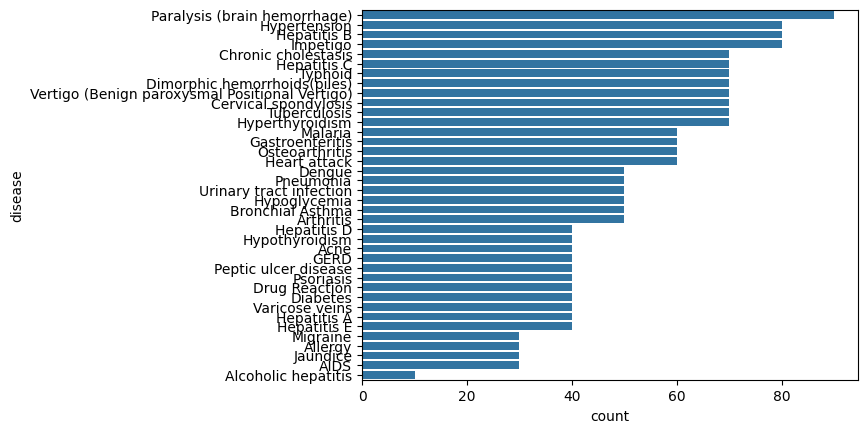

In [8]:
sns.countplot(df['disease'])

Here we can see the data is imbalanced 

In [9]:
# How iloc works

x = df.iloc[:,:-1]
x

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1995,1,1,0,0,1,0,0,0,1,1
1996,1,0,0,0,1,1,1,0,1,1
1997,1,0,0,1,0,0,0,0,0,1
1998,0,0,0,0,1,1,0,0,0,1


In [10]:
y = df.iloc[:,-1]
y

0       Paralysis (brain hemorrhage)
1       Paralysis (brain hemorrhage)
2       Paralysis (brain hemorrhage)
3       Paralysis (brain hemorrhage)
4       Paralysis (brain hemorrhage)
                    ...             
1995             Alcoholic hepatitis
1996             Alcoholic hepatitis
1997             Alcoholic hepatitis
1998             Alcoholic hepatitis
1999             Alcoholic hepatitis
Name: disease, Length: 2000, dtype: object

In [14]:
#let add a new column 

lable = LabelEncoder()
df['disease_lable'] = lable.fit_transform(df['disease'])
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease,disease_lable
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage),29
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage),29
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage),29
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage),29
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage),29


In [16]:
# Let see the correllation
df_new = df.drop('disease',axis=1)
df_new.corr()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease_lable
fever,1.000000,-0.025800,-0.007237,-0.019315,-0.090159,0.005291,-0.041265,-0.090177,0.016816,-0.014012,-0.001362
headache,-0.025800,1.000000,-0.036936,-0.035542,-0.044078,0.061000,0.013214,-0.000879,-0.078815,-0.052825,0.033452
nausea,-0.007237,-0.036936,1.000000,-0.031345,0.056336,-0.095370,-0.048594,0.030836,-0.008677,-0.008069,-0.110131
vomiting,-0.019315,-0.035542,-0.031345,1.000000,0.127868,-0.032053,-0.105106,-0.009793,0.020684,-0.038952,-0.027101
fatigue,-0.090159,-0.044078,0.056336,0.127868,1.000000,-0.132126,-0.053073,0.059114,-0.069493,-0.102741,0.098856
joint_pain,0.005291,0.061000,-0.095370,-0.032053,-0.132126,1.000000,-0.030303,-0.097174,-0.044099,-0.037477,-0.081884
skin_rash,-0.041265,0.013214,-0.048594,-0.105106,-0.053073,-0.030303,1.000000,-0.050753,-0.018435,-0.034108,0.056618
cough,-0.090177,-0.000879,0.030836,-0.009793,0.059114,-0.097174,-0.050753,1.000000,-0.006383,-0.051358,-0.006499
weight_loss,0.016816,-0.078815,-0.008677,0.020684,-0.069493,-0.044099,-0.018435,-0.006383,1.000000,0.019198,-0.021764
yellow_eyes,-0.014012,-0.052825,-0.008069,-0.038952,-0.102741,-0.037477,-0.034108,-0.051358,0.019198,1.000000,-0.124325


<Axes: >

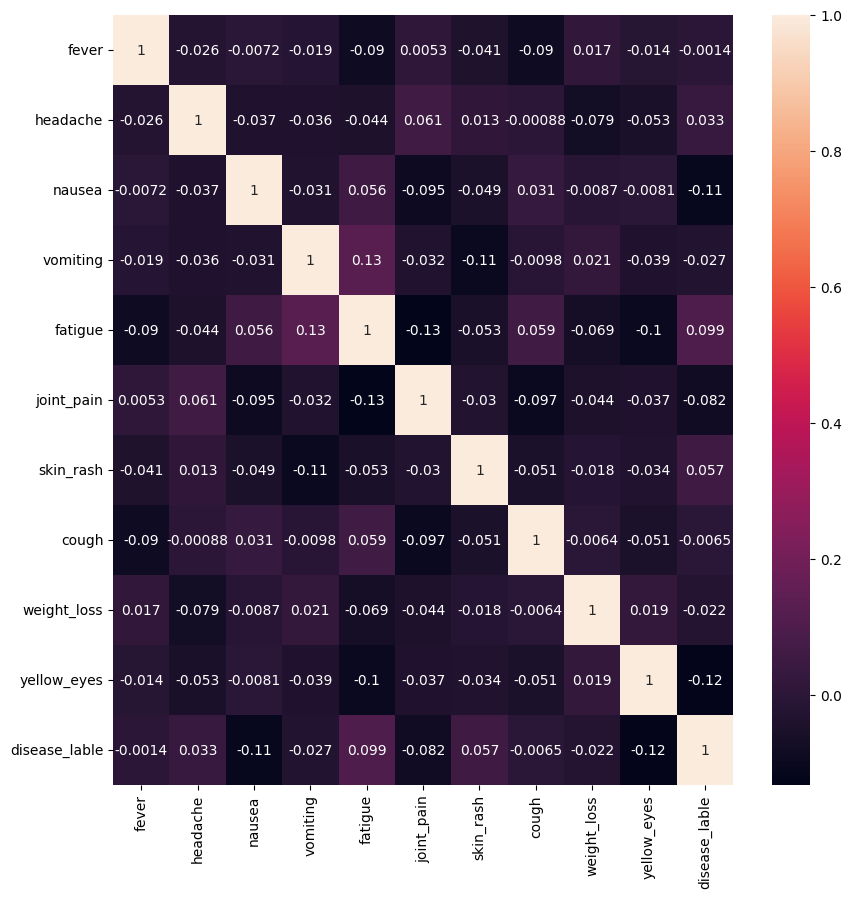

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True)

In [26]:
x = df.iloc[:,:-2]
x.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,0,0,1,1,0,0
2,0,0,1,0,1,0,1,1,0,0
3,0,0,1,1,1,0,1,1,1,1
4,1,0,1,0,1,0,0,0,1,1


In [28]:
y = df.iloc[:,-1]
y.head()

0    29
1    29
2    29
3    29
4    29
Name: disease_lable, dtype: int64

<Axes: xlabel='disease_lable', ylabel='count'>

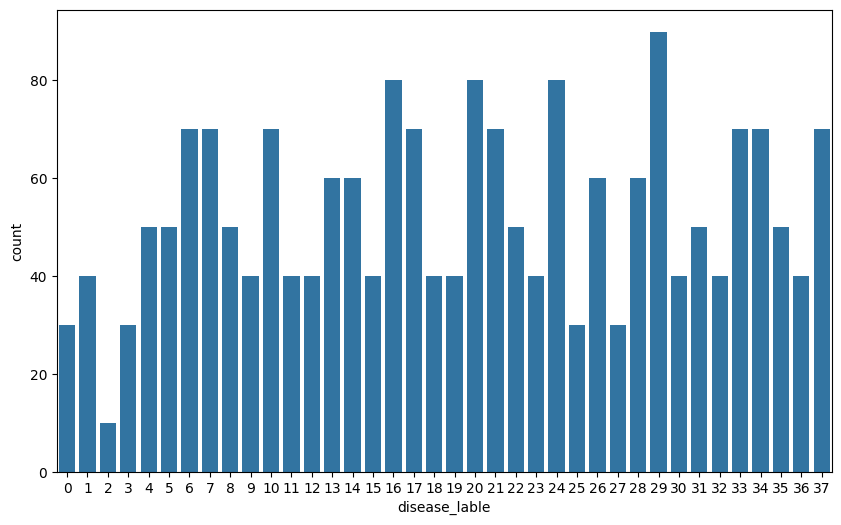

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=y)

Let use randome over sampleing to balanced the data